<a href="https://colab.research.google.com/github/FaithOsamaye/Telecochurn/blob/main/TelecoChurnCustomers_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tel = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Descriptive Analysis

In [ ]:
tel.shape

(7043, 21)

In [ ]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insight:

Total charge is in a bad format.

Change contract type to monthly and yearly.

Chnage senior citizens to just 1 and 0

In [ ]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning

In [ ]:
tel.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
tel.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# Incorrect data type

In [ ]:
tel['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
tel['TotalCharges']= pd.to_numeric(tel['TotalCharges'], errors='coerce')

In [ ]:
tel['TotalCharges'].isnull().sum()

11

In [ ]:
tel.dropna(subset='TotalCharges', inplace= True)

In [ ]:
tel['Contract']= tel['Contract'].replace('Month-to-month','Monthly')


In [ ]:
tel['SeniorCitizen']= tel['SeniorCitizen'].replace(1,'Yes')
tel['SeniorCitizen']= tel['SeniorCitizen'].replace(0,'No')

In [ ]:
tel['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

# **Questions and Answers**

**1. What is the percentage of churned and non-churned customers?**

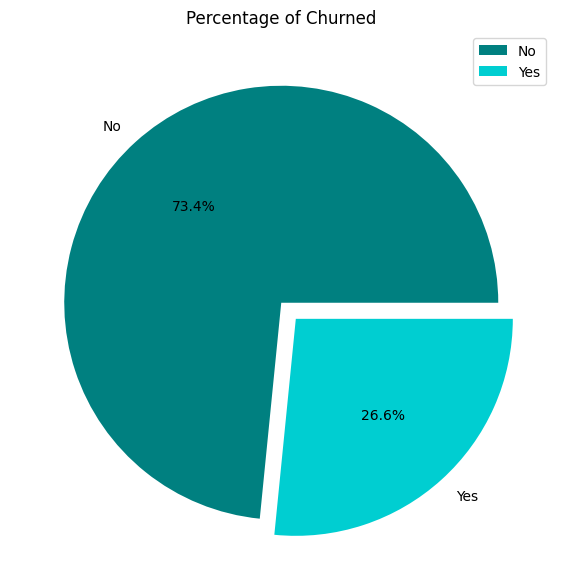

In [ ]:
churned = tel['Churn'].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,10))
plt.pie(churned.values, labels=churned.index, colors=['teal','darkturquoise'],explode=explode,autopct='%1.1f%%')
plt.title('Percentage of Churned')
plt.legend()



**Insights**:

A good percentage of our customers have not yet churned, which is good news to the company. But the percent that has churned seems to be quite worrisome as it accounts for almsot 30 percent of the customers.

**2. What is the ratio of the churned rate amongst gender?**

Text(0, 0.5, 'Counts of gender')

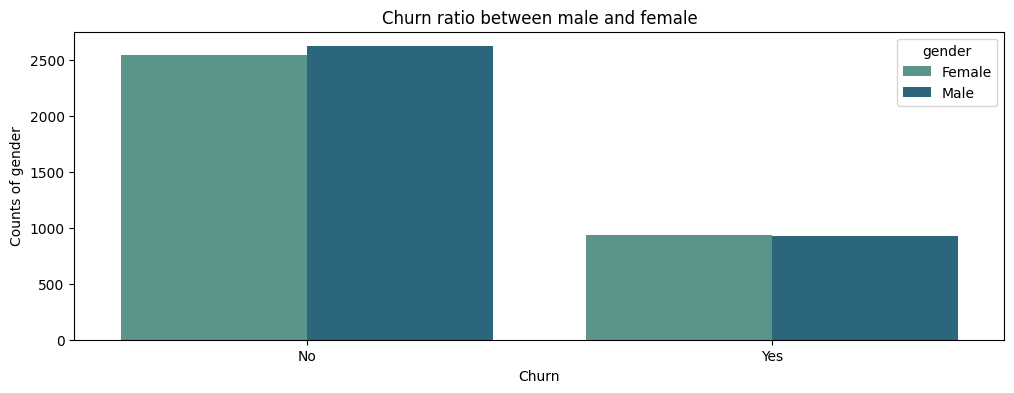

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Churn',hue='gender',data=tel,palette='crest')
plt.title('Churn ratio between male and female')
plt.ylabel('Counts of gender')


**Insights**:

 Male members constitutes our highest customers. The number of people who have left the company between the male and female is about the same number which is really close to 1,000 for each gender.

**3. How has the tenure being in terms of the contract?**

In [ ]:
bins=[1,20,40,60,80]
tenure_labels  = ['1-20(1-2decades)','21-40(2-4decades)','41-60(4-6decades)','61-80(6-8decades)']
#tenure_labels  = [{1-20:'2decades',21-40:'4decades',41-60:'6decades',61-80:'8decades'}]

tel['tenure_decades'] = pd.cut(tel['tenure'], bins=bins, labels=tenure_labels)

Text(0, 0.5, 'Tenure over the decade')

<Figure size 1200x500 with 0 Axes>

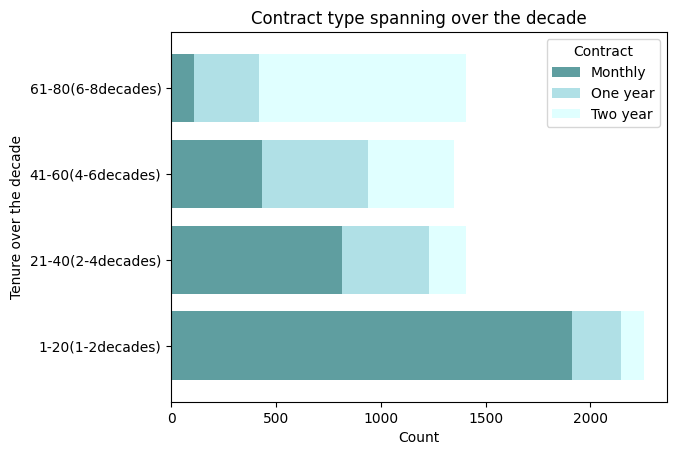

In [ ]:
plt.figure(figsize=(12,5))
col= ['cadetblue','powderblue','lightcyan']
tenure_grouped = tel.groupby(['tenure_decades','Contract']).size().unstack()
tenure_grouped.plot(kind='barh', stacked=True, color =col,width=0.8)
plt.title('Contract type spanning over the decade')
plt.xlabel('Count')
plt.ylabel('Tenure over the decade')


**Insights**:

1. Customers who have stayed for 1-2 decades very much prefer the monthly package. only a few persons like the yearly package.

2. All through the decades, the monthly package seems to be the most preferred but when it got to our longest standing decade which is the 6-8 decades, the contract type changed as it seems the customers know they will stick with the company longer hence why they opted for the two years package.

**4. What payment method had the highest total charge?**

Text(0.5, 1.0, 'Average Total Charge for Payment Avenues')

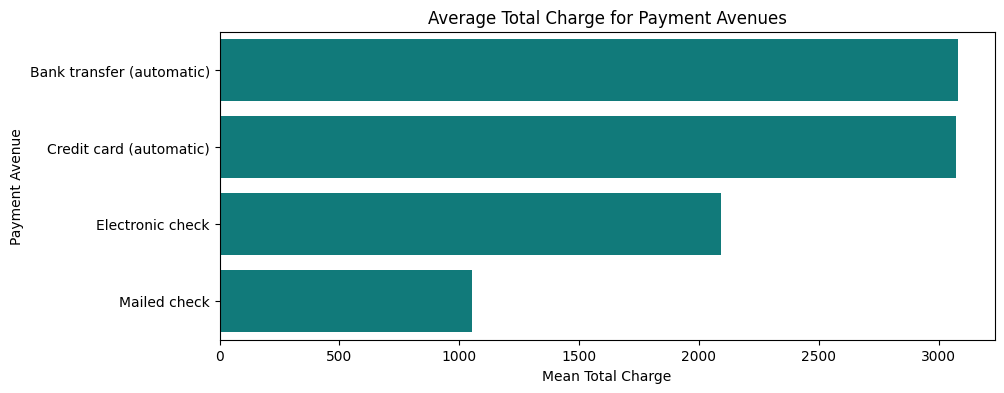

In [ ]:
payment_grouped = tel.groupby('PaymentMethod')['TotalCharges'].mean().reset_index()
payment_grouped=payment_grouped.sort_values('TotalCharges', ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x='TotalCharges', y='PaymentMethod', data=payment_grouped,color='darkcyan')
plt.xlabel('Mean Total Charge')
plt.ylabel('Payment Avenue')
plt.title('Average Total Charge for Payment Avenues')

**Insights**:

Bank transfer has an average of 3,079 which is close to the credit card payment of 3,071. its safe to say the bank transfers and the credit card are vying for the top positions and it seems to be a more convient means of transfering money. Mailed checks do not do so greatly.

**5. It seems like bank transfers and credit card payment are the ones raking in more money? Is it the most prefered means of payment amongst customers or not?**

<ipython-input-78-39c28a52a8dc>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Total Count of Payment Method')

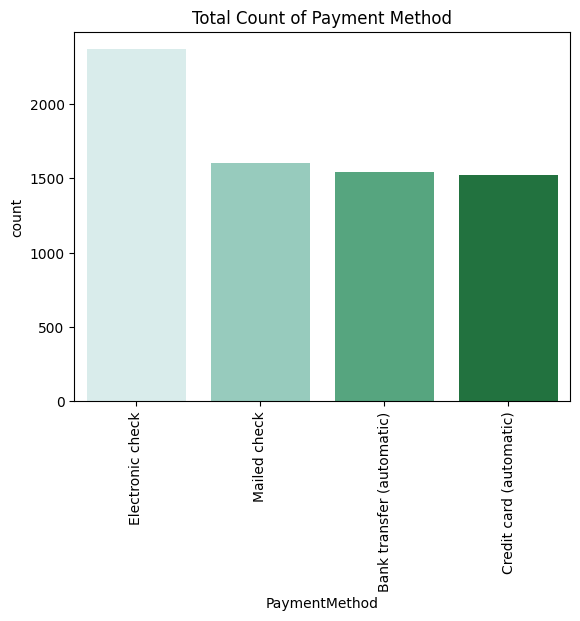

In [ ]:
sns.countplot(x='PaymentMethod', data=tel,palette ='BuGn')
plt.xticks(rotation=90)
plt.title('Total Count of Payment Method')

**Insights**:

 It seems like electronic check is mostly used by people even thou it didnt do so badly in terms of the average total charge. But mailed check raked in the least amount of money but it is mostly used by people.
The customers leaving might have faced inconviences with payment and hence that is why they churned.

**6. How has the churned rate being amongst the payment methods?**

Text(0.5, 1.0, 'Payment Method Churned or Not')

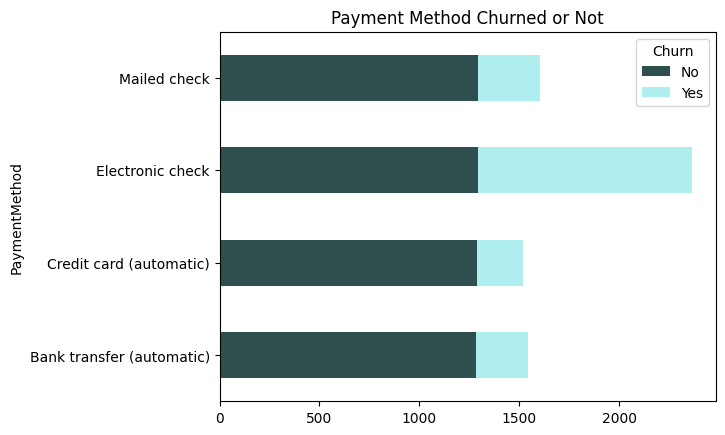

In [ ]:
paymentchurned_grouped = tel.groupby(['PaymentMethod','Churn']).size().unstack()
paymentchurned_grouped.plot(kind='barh',stacked=True,color=['darkslategrey','paleturquoise'])
plt.title('Payment Method Churned or Not')

**Insight**:

Despite having electronic check has our highest means of payment, it happens to be the fastest churned. Over 1,000 customers who pay via this means have churned.

Mailed check is the second most used means of payment, it has over 300 customers who has churned.

**7. What is the internet service like with phoneservices and multiple lines?**

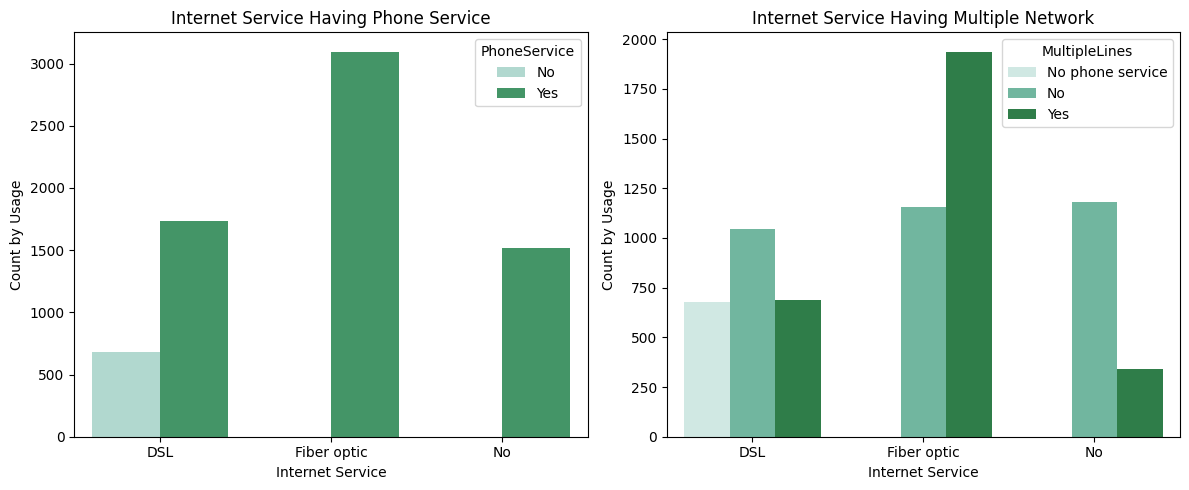

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='InternetService',data=tel,hue='PhoneService',ax=axes[0],palette='BuGn')
sns.countplot(x='InternetService',data=tel,hue='MultipleLines',ax=axes[1], palette='BuGn')
axes[0].set_title('Internet Service Having Phone Service')
axes[0].set_xlabel('Internet Service')
axes[0].set_ylabel('Count by Usage')
axes[1].set_title('Internet Service Having Multiple Network')
axes[1].set_xlabel('Internet Service')
axes[1].set_ylabel('Count by Usage')
plt.tight_layout()

**Insight**:

Axes[0]: Fiber optic services has the best phone service. People who do not have internet service has phone service(maybe they only make calls and do not go on the internet). DSL sometimes do not have phone service.

Axes[1]: Fiber Optic internt service users get more than one for themselves or their families. DSL users do not really fancy having multiple Internet service.

**8. What internet service was churned the most?**

Text(0, 0.5, 'Count of Churned')

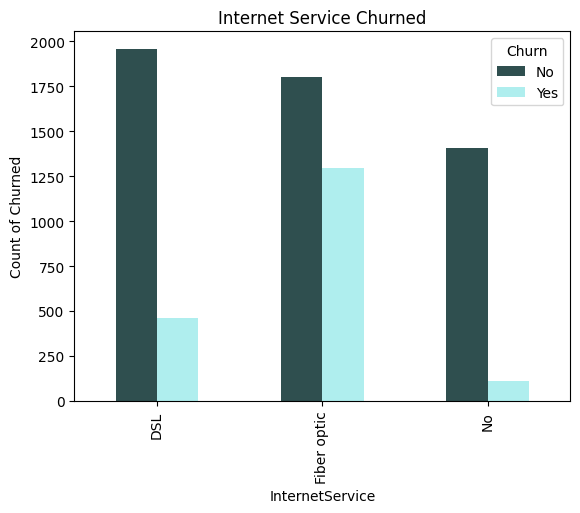

In [ ]:
Internet_churned = tel.groupby(['InternetService','Churn']).size().unstack()
Internet_churned.plot(kind='bar',color=['darkslategrey','paleturquoise'])
plt.title('Internet Service Churned')
plt.ylabel('Count of Churned')

**Insights**:

For some reason even as DSL does not have high numbers as Fiber Optics, it is still the highest that has not been churned. But Fiber Optics a very high number of churned customers. Perhaps the customers who churn are senior citizens.

**9. What percent of our customers are senior Citizens?**

Text(0.5, 1.0, 'Percentage of Senior Citizen')

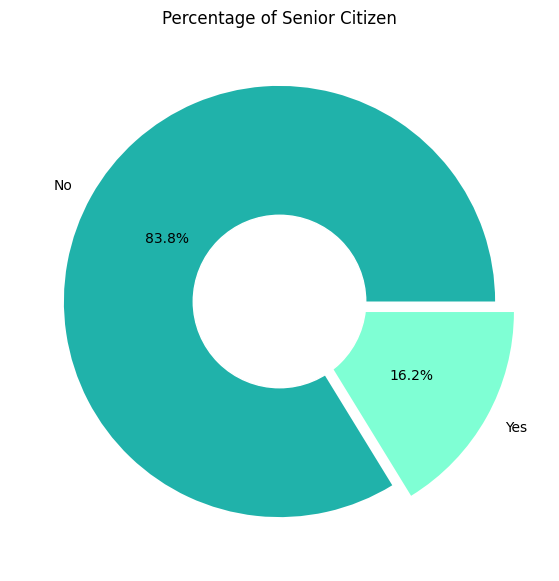

In [ ]:
plt.figure(figsize=(15,7))
Snr_count=tel['SeniorCitizen'].value_counts()
explode =[0.0,0.1]
plt.pie(Snr_count.values, labels=Snr_count.index, explode=explode, autopct='%1.1f%%',colors=['lightseagreen','aquamarine'])
my_circle= plt.Circle((0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of Senior Citizen')


**Insights**:

Senior citizens accounts for 16% of our total population

**10. Did the snr citizens have phone support? is that why they left or not?**

<Axes: xlabel='SeniorCitizen'>

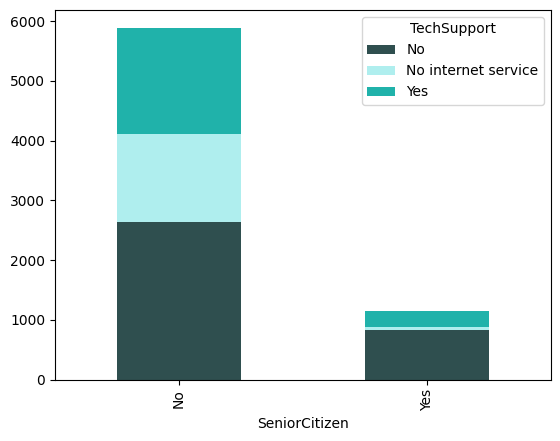

In [ ]:
senior_tech = tel.groupby(['SeniorCitizen','TechSupport']).size().unstack()
senior_tech.plot(kind='bar',stacked=True,color=['darkslategrey','paleturquoise','lightseagreen'])

**Insights:**

Senior citizens do not have as much tech support.